In [54]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install pyarrow
%pip install plotly
%pip install --upgrade nbformat
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.6 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.2.0-py3-n

In [55]:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [56]:
df = pd.read_csv("./Earthquakes.csv")
df.drop(columns=["Unnamed: 0", "id", "updated"], inplace=True)
df.head(8)

,Date,Time,latitude,longitude,depth,mag,magType,nst,net,place,type
0,2014-03-17,05:11:34,-20.0030,-70.8741,17.0,6.2,mww,NaN,us,"80km WNW of Iquique, Chile",earthquake
1,2014-03-16,21:16:30,-19.9246,-70.6278,20.0,6.7,mww,NaN,us,"60km WNW of Iquique, Chile",earthquake
2,2014-03-15,23:51:30,-5.5660,-80.8790,9.8,6.3,mwp,NaN,us,"6km W of Sechura, Peru",earthquake
3,2014-03-15,08:59:21,-14.0935,-76.2968,20.0,6.1,mww,NaN,us,"25km S of Paracas, Peru",earthquake
4,2014-03-13,17:06:50,33.6793,131.8197,79.0,6.3,mwb,NaN,us,"15km NNE of Kunisaki-shi, Japan",earthquake
5,2014-03-11,22:03:11,-3.1128,148.4774,10.0,6.1,mww,NaN,us,"180km SE of Lorengau, Papua New Guinea",earthquake
6,2014-03-11,02:44:05,-60.8391,-19.9569,10.0,6.4,mww,NaN,us,East of the South Sandwich Islands,earthquake
7,2014-03-10,05:18:13,40.8287,-125.1338,16.6,6.8,Mw,NaN,nc,"77km WNW of Ferndale, California",earthquake


In [57]:
df.describe()

,latitude,longitude,depth,mag,nst
count,8313.000000,8313.000000,8313.000000,8312.000000,8111.000000
mean,4.954110,47.350161,76.855975,6.564870,245.151399
std,29.898265,122.446592,134.029768,0.482917,204.853588
min,-71.000000,-179.990000,0.000000,6.000000,0.000000
25%,-16.120000,-72.051000,15.000000,6.200000,63.000000
50%,-0.534000,120.231000,32.100000,6.500000,221.000000
75%,32.327000,146.430000,57.200000,6.900000,371.500000
max,84.964000,180.000000,720.000000,9.600000,999.000000


In [58]:
df[['mag','depth']].corr()

,mag,depth
mag,1.000000,0.040424
depth,0.040424,1.000000


In [59]:
df[['mag', 'latitude', 'longitude']].corr()

,mag,latitude,longitude
mag,1.000000,0.078546,0.025740
latitude,0.078546,1.000000,0.141913
longitude,0.025740,0.141913,1.000000


<Axes: >

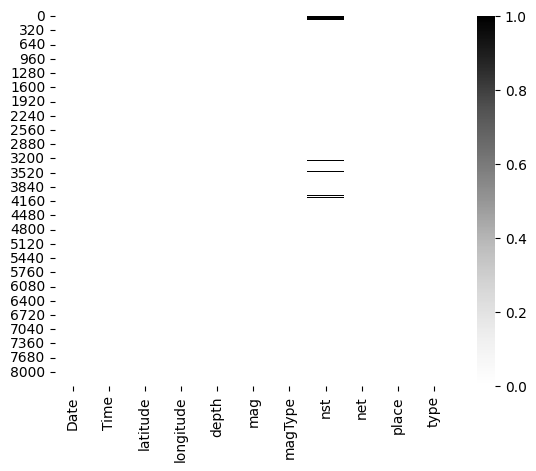

In [60]:
sns.heatmap(df.isnull(), cmap="Greys", vmax=1,vmin=0)

<Axes: >

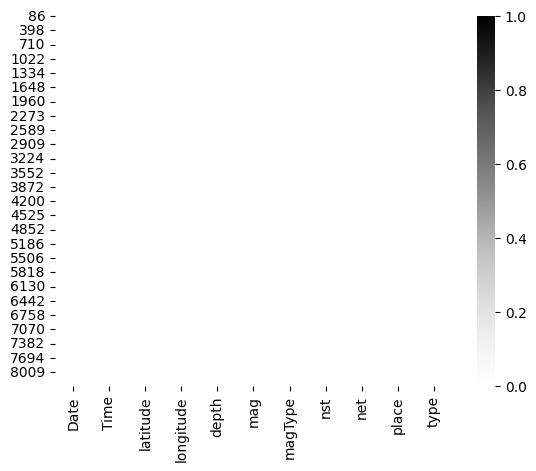

In [61]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(), cmap="Greys", vmax=1,vmin=0)

In [62]:
df["country"] = df["place"].str.split(",",expand=True)[1]
df.head()

,Date,Time,latitude,longitude,depth,mag,magType,nst,net,place,type,country
86,2013-07-22,07:01:42,-46.0417,34.8255,10.00,6.1,Mwb,73.0,us,"244km WNW of Marion Island, Prince Edward Islands",earthquake,Prince Edward Islands
87,2013-07-21,05:09:31,-41.7134,174.4431,14.00,6.5,Mww,106.0,us,"46km ESE of Blenheim, New Zealand",earthquake,New Zealand
88,2013-07-17,02:37:42,-15.6346,-71.7729,6.59,6.0,Mww,88.0,us,"18km W of Chivay, Peru",earthquake,Peru
89,2013-07-16,09:35:54,-6.3085,154.7822,44.25,6.0,Mwb,87.0,us,"77km W of Panguna, Papua New Guinea",earthquake,Papua New Guinea
90,2013-07-15,14:03:43,-60.8679,-25.1436,30.98,7.3,Mww,379.0,us,"218km SSE of Bristol Island, South Sandwich Is...",earthquake,South Sandwich Islands


In [63]:
df["Date"] = pd.to_datetime(df["Date"])
df["year"] = df["Date"].dt.year
df.set_index("Date", inplace = True)

In [101]:
fig = px.scatter(df, x="year",y="nst",color="country")
fig.show()

In [67]:
fig = px.scatter_geo(
    df,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    color_continuous_scale=px.colors.sequential.Plasma,
    opacity=0.3,
    projection="equirectangular",
    color="mag",
    hover_data=["mag", "year", "place", "depth"],  # Display price when hovering mouse over house,
    title= f"Earthquakes 1900-2014"
)

fig.show()